# **Librería Pandas**

Pandas es una librería de Python especializada en la manipulación y análisis de estructura de datos.

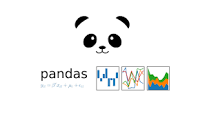

In [2]:
import pandas as pd

Las principales características de esta librería son:

* Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.
* Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
* Permite acceder a los datos mediante índices o nombres para filas y columnas.
* Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
* Permite trabajar con series temporales.
* Realiza todas estas operaciones de manera muy eficiente.

**Tipos de datos de Pandas**

Pandas dispone de tres estructuras de datos diferenctes:

* Series: Estructura de una dimensión
* DataFrame: Estructura de dos dimensiones (tablas)
* Panel: Estructura de tres dimensiones (cubos)



## **Clase de objeto Series**

Son estructuras similares a los arrays de una dimensión. Son homogéneas, es decir, sus elementos tienen que ser del mismo tipo, y su tamaño es inmutable, es decir, no se puede cambiar, aunque si su contenido.

Dispone de una índice que asocia un nombre a cada elemento de la serie, a través de la cuál se accede al elemento.

In [3]:
#Series(data = lista, index = indices, stype = tipo)
S = pd.Series(['Vida', 'Auto', 'Cesantía', 'Desgravamen'], dtype = 'object')
print(S)

0           Vida
1           Auto
2       Cesantía
3    Desgravamen
dtype: object


**Atributos de una serie**

1. `s.size`: Devuelve el número de elementos de la serie `s`

2. `s.index`: Devuelve una lista con los nombrs de las filas del DataFrame `s`

3. `s.dtype`: Devuelve el tipo de datos de lso elementos de la serie `s`

In [4]:
S.size
S.index
S.dtype

dtype('O')

## **Clase de objeto DataFrame**

un objeto del tipo DataFrame define un conjunto de datos estructurados en forma de tabla donde cada columna es un objeto de tipo Series, es decir, todos los datos de una misma columna son del mismo tipo, y las filas son registros que pueden contender datos de distintos tipos.

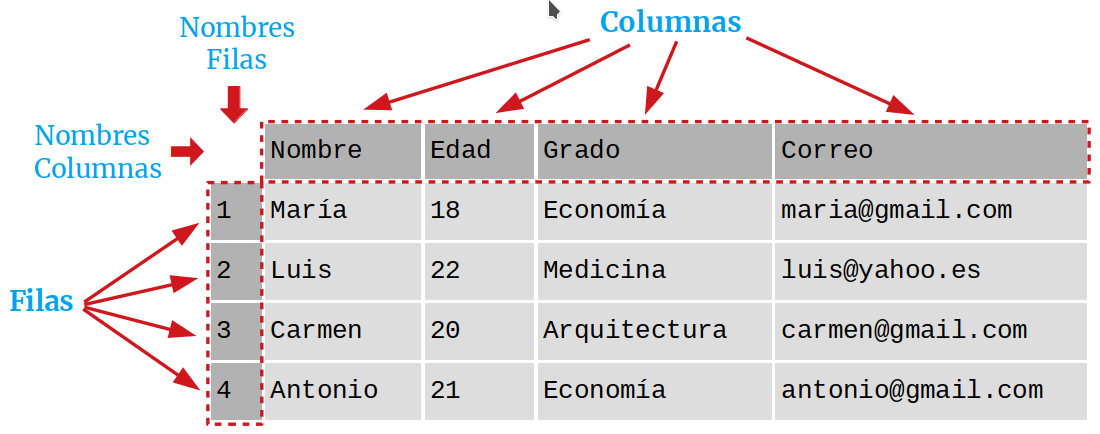

**Creación de un DataFrame**

1. Creación a partir de una lista:

`DataFrame(data = listas, index = filas, columns = columnas, dtype = tipos)`:  Dvuelve un objeto del tipo DataFrame cuyas columnas son los valores de las listas de la lista `listas`, los nombres de las filas indicados en la listas `filas`, los nombres de columnas indicados en la lista columnas.

In [5]:
df = pd.DataFrame([['María', 18], ['Luis', 22], ['Carmen', 20]], columns=['Nombre', 'Edad'])
print(df)

   Nombre  Edad
0   María    18
1    Luis    22
2  Carmen    20


2. Creación a partir de un fichero csv o excel

* `read_csv(fichero.csv, sep = separador, header = nombre_columnas, index_col = nombre_filas, na_values = no-validos, decimal = separador_decimal)`

* `read_excel(fichero.xlsx, sheet_name=hoja, header=n, index_col=m, na_values=no-validos, decimal=separador-decimal)`

In [6]:
#Desde unidad local
from google.colab import files
uploaded = files.upload()

Saving Parametros Base.xlsx to Parametros Base.xlsx


In [9]:
import io
df = pd.read_excel('/content/Parametros Base.xlsx', sheet_name = 'Coberturas')

In [10]:
#Desde Google Drive
from google.colab import drive
drive.mount('/content/drive')

df1= pd.read_csv('/content/drive/MyDrive/siniestralidad_seguros.csv')
print(df1)

Mounted at /content/drive
    Año Tipo de Siniestro  Cantidad  Costo Total (USD)
0  2020         Automóvil       120              50000
1  2020              Vida        80              40000
2  2021         Automóvil       140              55000
3  2021              Vida        85              42000
4  2022         Automóvil       150              60000
5  2022              Vida        90              45000
6  2023         Automóvil       160              65000


**Exportar un DataFrame**

Existen funciones para exportar DataFrame a un archivo con diferentes formatos

* `df.to_csv('siniestralidad_seguros.csv', sep = ",", header = true, index = true)` Si se exporta de esta manera los nombres de las columnas se exportarán como filas y los indices de las filas se exportarán como columnas.
* `df.to_excel('siniestralidad_seguros.xlsx', sheet_name = "Hoja 1", header = True, index = True)`Esta función se comporta de manera similar a `df.to_csv` pero al ser un archivo excel no se indica el separador y se puede indicar el nombre de la fila

**Ejemplo:**

Lea el archivo `primas_vida.csv` ubicado en *colocar ubicación* y exporte el mismo archivo en formato `excel` en el nommbre de la hoja colocar `clase1_modulo3`

**Métodos de un DataFrame**

* `df.head(n)` : Devuelve las n primeras filas del DataFrame df.

* `df.tail(n)` : Devuelve las n últimas filas del DataFrame df.

* `df.describe()` : Proporciona estadísticas descriptivas del DataFrame, como la media, la desviación estándar, el mínimo, el máximo, etc

* `df.info()` : Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.






**Atributos de un DataFrame**



* `df.shape` : Devuelve una tupla con el número de filas y columnas del DataFrame df.

* `df.size` : Devuelve el número de elementos del DataFrame.

* `df.columns` : Devuelve una lista con los nombres de las columnas del DataFrame df.

* `df.index` : Devuelve una lista con los nombres de las filas del DataFrame df.

* `df.dtypes` : Devuelve una serie con los tipos de datos de las columnas del DataFrame df.

*Dato:* La diferencia entre un método y un atributo en Python es que un método realiza alguna acción o cálculo, mientras que un atributo es simplemente un valor almacenado en un objeto. En este caso, info() es un método porque realiza la acción de imprimir información detallada sobre el DataFrame en lugar de ser simplemente un valor almacenado.

Ejemplo: Probemos algunos métodos ó atributos en la BBDD `base_seguros.csv`

In [11]:
#2.- Visualicemos que la carga de la BBDD haya quedado correcta
df.head(5)

,KEY_3,NOMBRE COBERTURA
0,27,Reembolso Gastos Catastroficos
1,29,Asistencia Medica Extranjero
2,30,Urgencia Beneficiario Titular
3,31,Urgencia Beneficiario Carga
4,28,Reembolso Gastos Oncologicos


In [12]:
#3.- Revisemos los principales estadísticos
df.describe()

,KEY_3
count,22.000000
mean,58.954545
std,52.302670
min,1.000000
25%,25.250000
50%,30.500000
75%,113.750000
max,147.000000


In [13]:
#4.- revisemos el tipo y cantidad de variables de la BBDD
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   KEY_3             22 non-null     int64 
 1   NOMBRE COBERTURA  22 non-null     object
dtypes: int64(1), object(1)
memory usage: 480.0+ bytes


In [14]:
#5.- ¿Cómo podemos saber la cantidad de filas de la BBDD?
df.shape

(22, 2)